# Realized Volatility

This code is used to calculate the realised volatility of our data, and attach it to our dataframes.

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions

import annualized_rv as arv

In [2]:
%matplotlib inline

[*********************100%%**********************]  1 of 1 completed


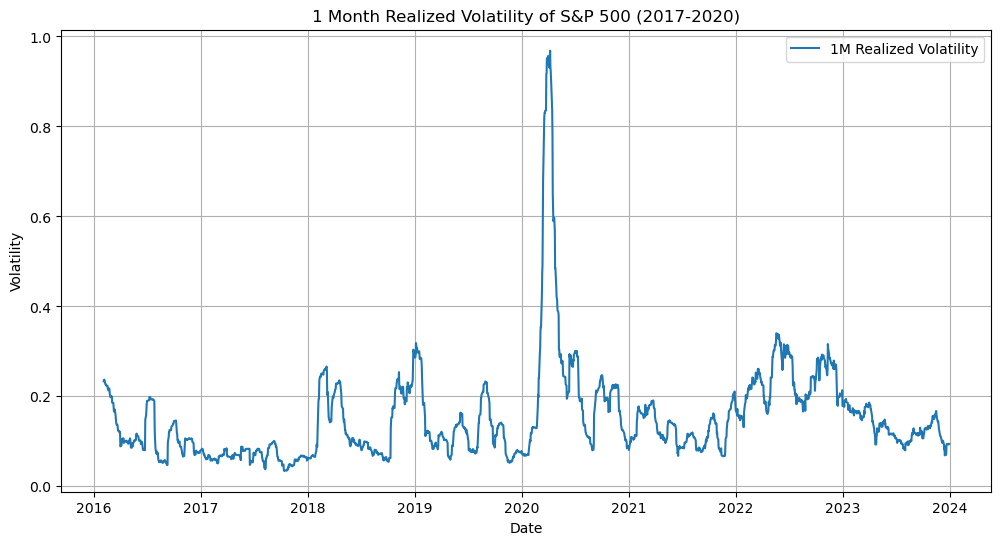

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download SP500 data from 2017 to 2020
sp500 = yf.download('^GSPC', start='2016-01-01', end='2023-12-31')

# Calculate daily returns
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Calculate realized volatility (rolling standard deviation of returns)
sp500['1M Realized Volatility'] = arv.annualized_volatility(sp500['Daily Return'],21)

# Plotting the realized volatility
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['1M Realized Volatility'], label='1M Realized Volatility')
plt.title('1 Month Realized Volatility of S&P 500 (2017-2020)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

#vix = yf.download('^VIX', start='2017-01-01', end='2020-12-31') # Vix index , close to impled vol calculated
# plt.plot(vix.index, vix['Adj Close']/40, label='VIX', color='orange')

plt.show()

In [35]:
sp500['1M Realized Volatility'].head()

Date
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
Name: 1M Realized Volatility, dtype: float64

In [37]:
newFulldataframesp500  = Fulldataframesp500.merge(sp500['1M Realized Volatility'],left_on = 'date' , right_on = 'Date')




In [39]:
newFulldataframesp500

,date,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility,1M Realized Volatility
0,2017-01-03,2256.207609,24,0.065753,0.008069,1,2145,115.20,2255.926204,0.950829,0.141237,0.082484
1,2017-01-03,2256.207609,24,0.065753,0.008069,1,2150,110.50,2255.926204,0.953045,0.139715,0.082484
2,2017-01-03,2256.207609,24,0.065753,0.008069,1,2155,105.85,2255.926204,0.955262,0.138392,0.082484
3,2017-01-03,2256.207609,24,0.065753,0.008069,1,2160,101.25,2255.926204,0.957478,0.137197,0.082484
4,2017-01-03,2256.207609,24,0.065753,0.008069,1,2165,96.70,2255.926204,0.959695,0.136073,0.082484
...,...,...,...,...,...,...,...,...,...,...,...,...
1029649,2021-12-31,4762.933152,35,0.095890,0.005325,-1,4980,219.20,4763.575346,1.045433,0.524059,0.167654
1029650,2021-12-31,4762.933152,35,0.095890,0.005325,-1,4985,223.75,4763.575346,1.046483,0.535061,0.167654
1029651,2021-12-31,4762.933152,35,0.095890,0.005325,-1,4990,228.30,4763.575346,1.047533,0.546053,0.167654
1029652,2021-12-31,4762.933152,35,0.095890,0.005325,-1,4995,232.95,4763.575346,1.048582,0.557209,0.167654


In [52]:
sp500['21dRealizedVolatility'] = arv.annualized_volatility(sp500['Daily Return'],21)
sp500['60dRealizedVolatility'] = arv.annualized_volatility(sp500['Daily Return'],60)


In [53]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,1M Realized Volatility,21dRealizedVolatility,60dRealizedVolatility
Date,,,,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,NaN,NaN,NaN,NaN
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,0.002012,NaN,NaN,NaN
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,-0.013115,NaN,NaN,NaN
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,-0.023700,NaN,NaN,NaN
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,-0.010838,NaN,NaN,NaN


In [54]:
newFulldataframesp500.head()

,date,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility,1M Realized Volatility
0,2017-01-03,2256.207609,24,0.065753,0.008069,1,2145,115.20,2255.926204,0.950829,0.141237,0.082484
1,2017-01-03,2256.207609,24,0.065753,0.008069,1,2150,110.50,2255.926204,0.953045,0.139715,0.082484
2,2017-01-03,2256.207609,24,0.065753,0.008069,1,2155,105.85,2255.926204,0.955262,0.138392,0.082484
3,2017-01-03,2256.207609,24,0.065753,0.008069,1,2160,101.25,2255.926204,0.957478,0.137197,0.082484
4,2017-01-03,2256.207609,24,0.065753,0.008069,1,2165,96.70,2255.926204,0.959695,0.136073,0.082484


In [68]:
newFulldataframesp500 = newFulldataframesp500.merge(sp500['21dRealizedVolatility'],left_on = 'date' , right_on = 'Date')
newFulldataframesp500 = newFulldataframesp500.merge(sp500['60dRealizedVolatility'],left_on = 'date' , right_on = 'Date')

,date,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility,21dRealizedVolatility,60dRealizedVolatility
0,2017-01-03,2256.207609,24,0.065753,0.008069,1,2145,115.20,2255.926204,0.950829,0.141237,0.082484,0.088145
1,2017-01-03,2256.207609,24,0.065753,0.008069,1,2150,110.50,2255.926204,0.953045,0.139715,0.082484,0.088145
2,2017-01-03,2256.207609,24,0.065753,0.008069,1,2155,105.85,2255.926204,0.955262,0.138392,0.082484,0.088145
3,2017-01-03,2256.207609,24,0.065753,0.008069,1,2160,101.25,2255.926204,0.957478,0.137197,0.082484,0.088145
4,2017-01-03,2256.207609,24,0.065753,0.008069,1,2165,96.70,2255.926204,0.959695,0.136073,0.082484,0.088145


In [ ]:
average_iv = pd.read_pickle(os.path.join(pickle_path,'average_iv_series_with_date_nasdaq100.pkl'))


In [70]:
newFulldataframesp500 = newFulldataframesp500.merge(sp500['Daily Return'],left_on = 'date' , right_on = 'Date') 


In [76]:
newFulldataframesp500.set_index('date',inplace = True)

In [77]:
lstmInputVariables = newFulldataframesp500[['21dRealizedVolatility', '60dRealizedVolatility', 'implied_volatility', 'Daily Return']]

In [78]:
lstmInputVariables

,21dRealizedVolatility,60dRealizedVolatility,implied_volatility,Daily Return
date,,,,
2017-01-03,0.082484,0.088145,0.141237,0.008487
2017-01-03,0.082484,0.088145,0.139715,0.008487
2017-01-03,0.082484,0.088145,0.138392,0.008487
2017-01-03,0.082484,0.088145,0.137197,0.008487
2017-01-03,0.082484,0.088145,0.136073,0.008487
...,...,...,...,...
2021-12-31,0.167654,0.137575,0.524059,-0.002626
2021-12-31,0.167654,0.137575,0.535061,-0.002626
2021-12-31,0.167654,0.137575,0.546053,-0.002626
